# Prática II

#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

#### Load the data

In [2]:
df = pd.read_csv("../data/Housing.csv")

In [3]:
df.shape

(5000, 7)

#### Label encoding

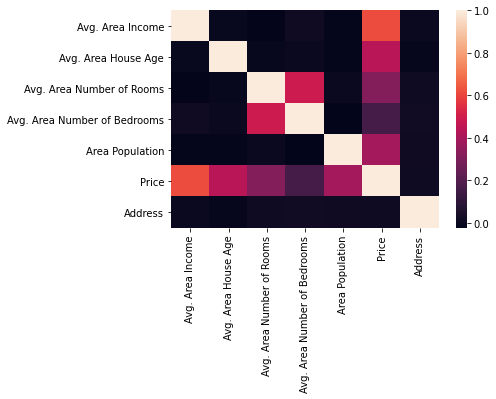

In [4]:
le = LabelEncoder()

df_new = df.apply(le.fit_transform)
corr = df_new.corr()
sns.heatmap(corr, xticklabels=corr.columns.values,
           yticklabels=corr.columns.values)

#### Create Pipeline Class

In [5]:
class MachineLearningPipeline:
  def __init__(self,df):
    self.df = df
  
  def modeling(self):
    cut_value = self.df['Price'].describe()[6]
    self.df['Price'] = ['Cheap' if x < cut_value else 'Expensive' for x in self.df['Price']]
  def dataCleaning(self):
    self.df.dropna()
    # Limpar outliers
  def standardizationEncoding(self):
    # Esse encoder vai ser importante para o predict depois
    self.le = LabelEncoder()
    self.df = self.df.apply(self.le.fit_transform)
    
  def selectColumns(self):
    self.X = self.df[['Avg. Area Income', 'Avg. Area House Age',\
                     'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', \
                     'Area Population']].values
    self.y = self.df['Price'].values
    
  def imbalancedCorrection(self):
    rus = RandomUnderSampler()
    self.X, self.y = rus.fit_sample(self.X, self.y)
  
  def trainTestSplit(self):
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=0)
  
  def train(self):
    self.logreg = LogisticRegression()
    self.logreg.fit(self.X_train, self.y_train)
    
  def evaluation(self):
    y_pred = self.logreg.predict(self.X_test)
    self.accuracy = metrics.accuracy_score(self.y_test, y_pred)

#### Call Pipeline methods

In [6]:
pipeline = MachineLearningPipeline(df)
pipeline.modeling()
pipeline.dataCleaning()
pipeline.standardizationEncoding()
pipeline.selectColumns()
pipeline.imbalancedCorrection()
pipeline.trainTestSplit()
pipeline.train()
pipeline.evaluation()

In [7]:
pipeline.accuracy

0.92

#### That's all folks!!!